Projet analyse de données:

##Olympics Althlete Events Analysis

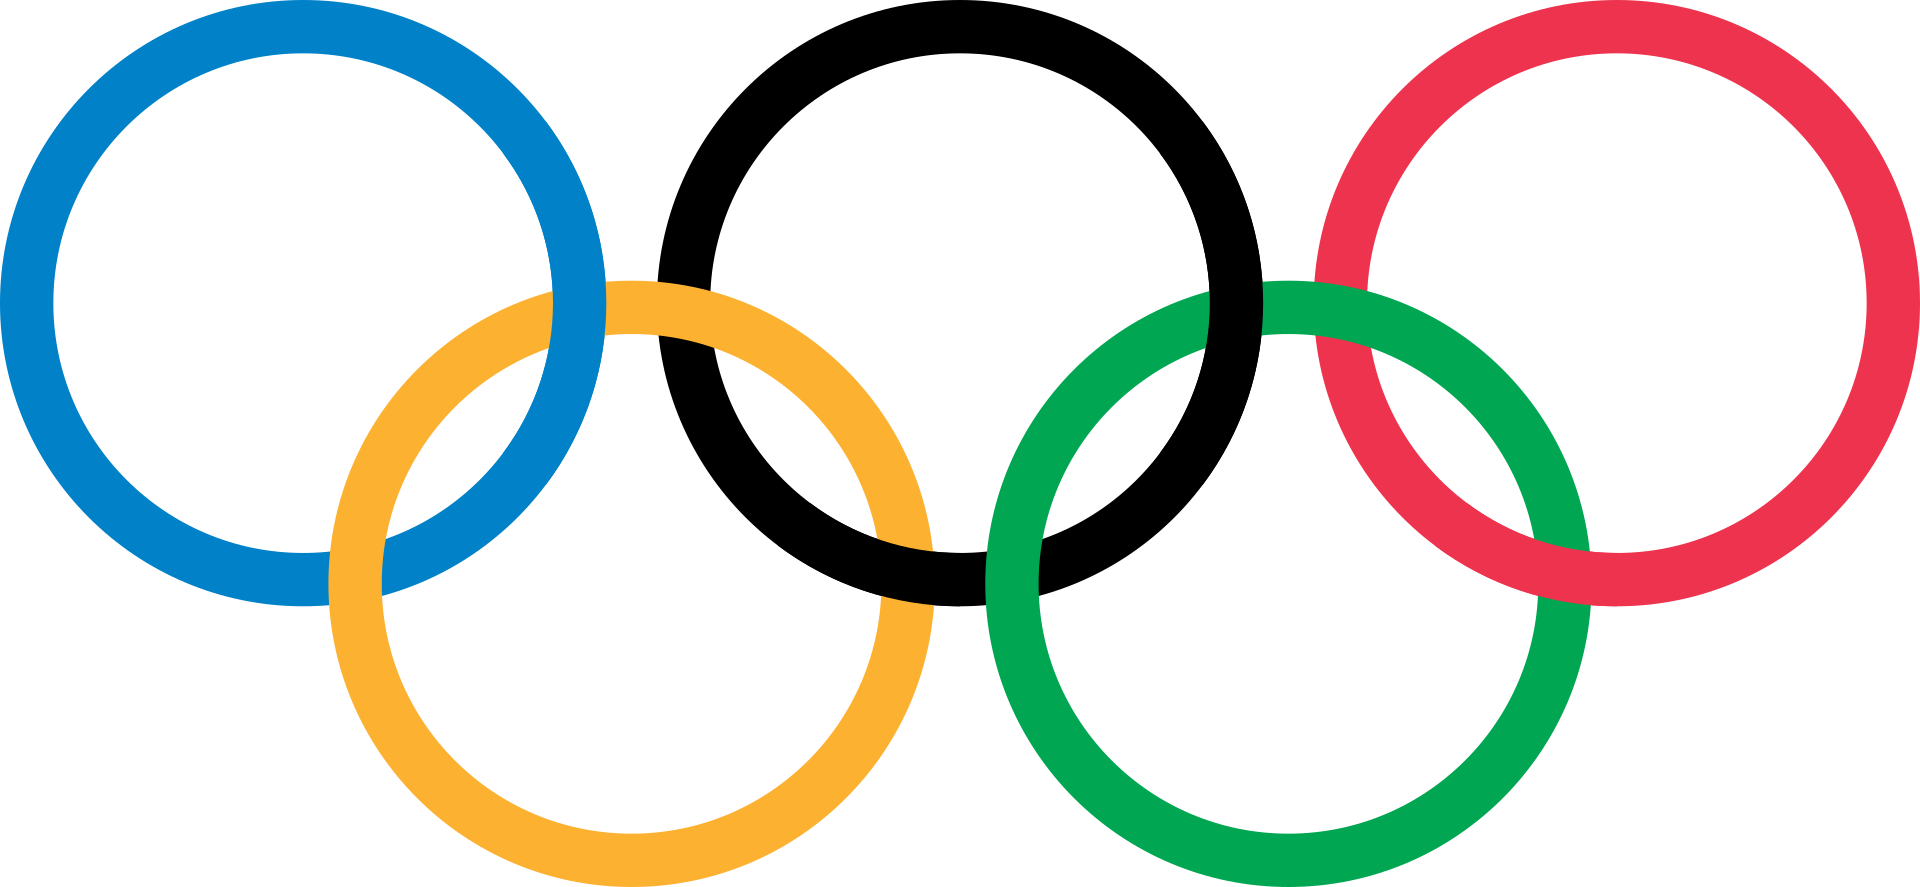

In [7]:
from IPython.display import Image
Image(filename='images/olympic_rings.png')


# Extracting valuable information from olympic data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dataset

In [2]:
df= pd.read_csv("data/athlete_events.csv")

In [3]:
df.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      271116 non-null  int64  
 1   name    271116 non-null  object 
 2   sex     271116 non-null  object 
 3   age     261642 non-null  float64
 4   height  210945 non-null  float64
 5   weight  208241 non-null  float64
 6   team    271116 non-null  object 
 7   noc     271116 non-null  object 
 8   games   271116 non-null  object 
 9   year    271116 non-null  int64  
 10  season  271116 non-null  object 
 11  city    271116 non-null  object 
 12  sport   271116 non-null  object 
 13  event   271116 non-null  object 
 14  medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


<AxesSubplot: >

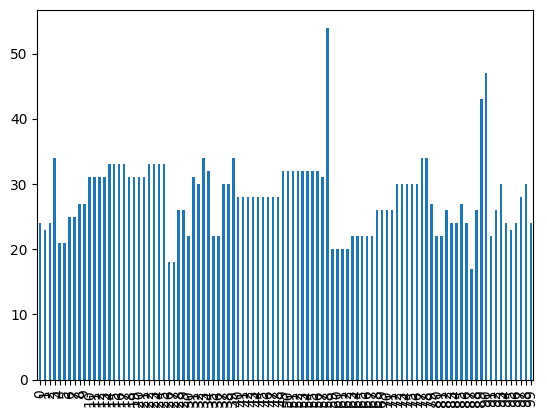

In [5]:
df["age"].head(100).plot(kind='bar')

In [6]:
print(df.head().to_markdown())

|    |   id | name                     | sex   |   age |   height |   weight | team           | noc   | games       |   year | season   | city      | sport         | event                            | medal   |
|---:|-----:|:-------------------------|:------|------:|---------:|---------:|:---------------|:------|:------------|-------:|:---------|:----------|:--------------|:---------------------------------|:--------|
|  0 |    1 | A Dijiang                | M     |    24 |      180 |       80 | China          | CHN   | 1992 Summer |   1992 | Summer   | Barcelona | Basketball    | Basketball Men's Basketball      | nan     |
|  1 |    2 | A Lamusi                 | M     |    23 |      170 |       60 | China          | CHN   | 2012 Summer |   2012 | Summer   | London    | Judo          | Judo Men's Extra-Lightweight     | nan     |
|  2 |    3 | Gunnar Nielsen Aaby      | M     |    24 |      nan |      nan | Denmark        | DEN   | 1920 Summer |   1920 | Summer   | Antwerpen | Footba